# 분석

In [23]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
import json
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [25]:
%matplotlib inline

In [9]:
tdm = np.load('mac_title_tdm.npz', encoding='latin1')

In [14]:
tdm.files

['arr_0']

In [15]:
tdm = tdm['arr_0'].item()

In [16]:
tdm

<223x500 sparse matrix of type '<class 'numpy.int64'>'
	with 985 stored elements in Undefined format>

In [12]:
with open('mac_tdm_title.json', encoding='utf8') as f:
    words = json.load(f)

In [13]:
words[:10]

['6월 29일', '6월 3일', '7종', '가격', '가계', '가맹', '가맹점', '가상현실', '가자', '가정']

In [17]:
count_mat = tdm.sum(axis=0)
count = np.squeeze(np.asarray(count_mat))
word_count = list(zip(words,count))
word_count = sorted(word_count,key=lambda x:x[1],reverse=True)

In [21]:
word_count[:10]

[('맥도날드', 35),
 ('외식', 12),
 ('햄버거', 12),
 ('이재현', 11),
 ('경영', 10),
 ('봉준호', 10),
 ('브랜드', 10),
 ('옥자', 10),
 ('인상', 10),
 ('치킨', 10)]

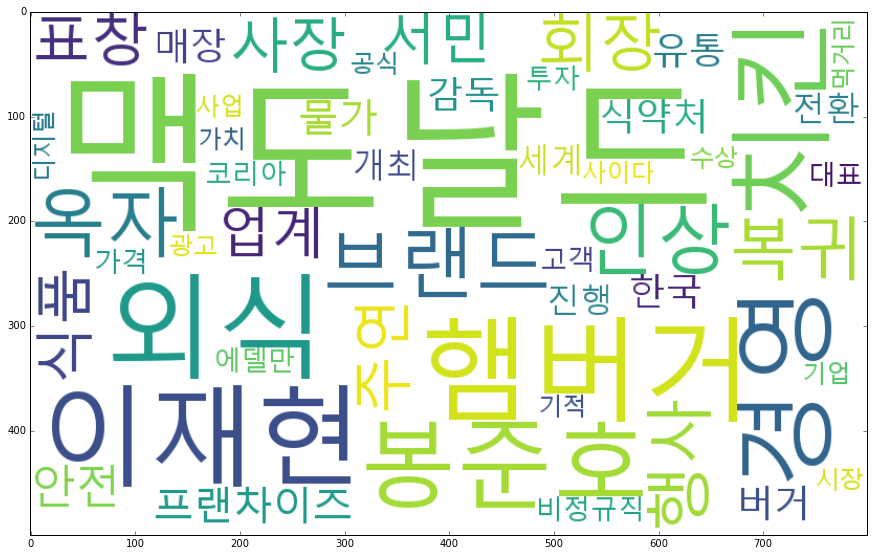

In [26]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=800, height=500)
cloud = wc.generate_from_frequencies(dict(word_count[:50]))
plt.figure(figsize=(15,12))
plt.imshow(cloud)

In [27]:
tdm = np.load('mac_contents_tdm.npz', encoding='latin1')
tdm = tdm['arr_0'].item()

In [28]:
tdm

<223x300 sparse matrix of type '<class 'numpy.int64'>'
	with 10448 stored elements in Undefined format>

In [30]:
with open('mac_tdm_contents.json', encoding='utf8') as f:
    words = json.load(f)

In [31]:
count_mat = tdm.sum(axis=0)
count = np.squeeze(np.asarray(count_mat))
word_count = list(zip(words,count))
word_count = sorted(word_count,key=lambda x:x[1],reverse=True)

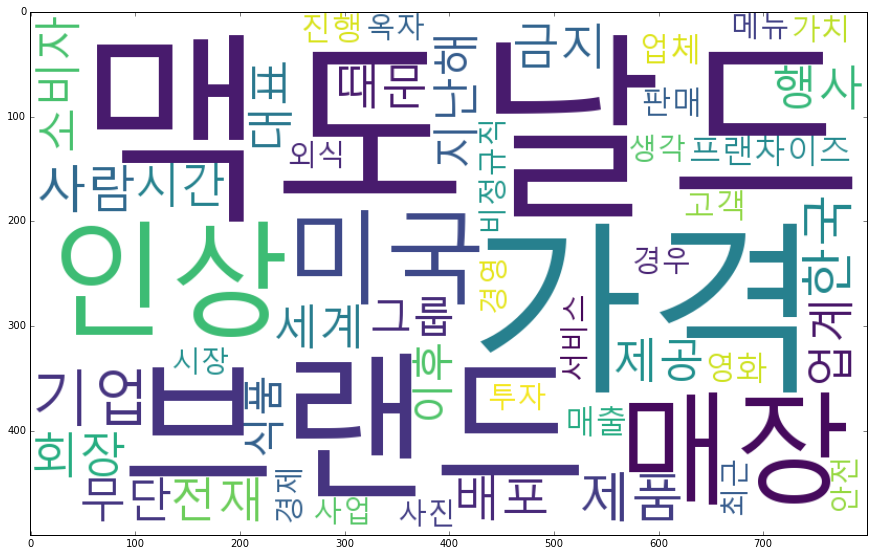

In [32]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=800, height=500)
cloud = wc.generate_from_frequencies(dict(word_count[:50]))
plt.figure(figsize=(15,12))
plt.imshow(cloud)

In [47]:
df = pd.read_csv("mac_comments.csv")

In [49]:
df['scores'] = df['like'] - df['unlike']

In [50]:
df.head()

,comment,like,recom_cnt,unlike,url,scores
0,자체 비정규직인 알바 (맥날용어:크루)과다양성 악화 충성도 1위입니다\r\n법망 박...,0,0,0,http://news.naver.com/main/read.nhn?mode=LSD&m...,0
1,존나게 갑질하는게 문제구만..,1,0,0,http://news.naver.com/main/read.nhn?mode=LSD&m...,1
2,갑질이 갑질이재! 80년 전에 갑질해서 만든 기업이라 지금도 무급 9개월 이매장저매...,4,0,0,http://news.naver.com/main/read.nhn?mode=LSD&m...,4
3,역시 재벌과 전경련이 만든 신문스럽네...,3,0,0,http://news.naver.com/main/read.nhn?mode=LSD&m...,3
4,왜 거기 노동자는 없나요?,8,0,0,http://news.naver.com/main/read.nhn?mode=LSD&m...,8


In [65]:
tdm = np.load('mac_comments_tdm.npz', encoding='latin1')
tdm = tdm['arr_0'].item()

In [89]:
tdm

<720x300 sparse matrix of type '<class 'numpy.int64'>'
	with 2101 stored elements in Undefined format>

In [71]:
tdm.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [45]:
with open('mac_tdm_comments.json', encoding='utf8') as f:
    words = json.load(f)

In [35]:
count_mat = tdm.sum(axis=0)
count = np.squeeze(np.asarray(count_mat))
word_count = list(zip(words,count))
word_count = sorted(word_count,key=lambda x:x[1],reverse=True)

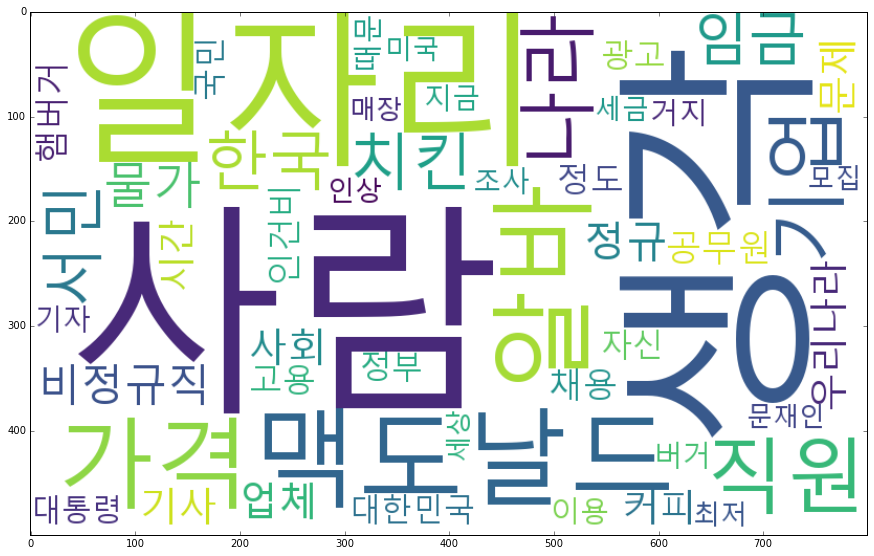

In [36]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=800, height=500)
cloud = wc.generate_from_frequencies(dict(word_count[:50]))
plt.figure(figsize=(15,12))
plt.imshow(cloud)

In [46]:
from sklearn.cross_validation import train_test_split

C:\Anaconda3\envs\py35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [54]:
df['scores'] = df['scores'].astype(np.int)

In [59]:
scores = [int(score) for score in df['scores']]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(tdm.todense(), scores, test_size=0.2, random_state=42)

In [73]:
from sklearn import linear_model

In [74]:
lassocv = linear_model.LassoCV()

In [75]:
lassocv.fit(X_train, y_train)

C:\Anaconda3\envs\py35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [85]:
len(X_train), len(y_train)

(576, 576)

In [87]:
count_mat = tdm.sum(axis=0)

In [88]:
count_mat

matrix([[35,  6,  4,  8,  4,  6,  8,  4, 15,  4, 11,  5,  6,  6,  6, 18,  5,
         20,  5,  4,  5,  4,  4, 17,  5,  4,  4,  6, 17,  5,  5,  6,  4,  5,
         10,  4,  5,  6, 23,  6, 33, 14,  4,  5,  7, 31,  6,  4,  4,  7,  8,
          5,  6,  5, 10,  4,  6,  4,  5,  4,  5, 11,  4,  6,  4, 16, 16,  7,
          4,  5,  4,  9,  6,  8,  7,  7, 15,  8,  4,  9,  6, 10,  4, 12,  5,
         42,  4, 13, 12, 23, 28, 13,  5,  5,  5,  4,  8,  4,  6,  5,  4, 14,
          4,  3,  5,  7,  4,  5,  5, 10,  4,  4,  4,  4,  7,  8, 27,  4, 59,
          6,  7,  5, 23,  8,  5,  7, 51,  4, 30,  4,  4,  5, 13,  9, 12,  5,
          8,  4,  9,  7, 21, 10,  8,  4,  5,  8,  4,  8,  7,  4,  9,  4,  4,
          6, 41,  4,  4,  4,  4,  4,  4,  6,  6, 24,  5,  8, 10,  4,  5,  6,
          4,  4,  5,  6,  6,  5,  5,  7,  5,  3,  7,  6, 22,  6, 10,  6, 10,
          5,  4,  4,  8,  7,  4,  5, 11, 11,  5, 15, 10,  7,  5,  7,  6,  9,
         19, 13,  8,  4,  4,  6, 44, 28,  6,  6, 11,  4, 16,  6,  7,  7,  6,

In [76]:
lassocv.alpha_

25.193657769097221

In [80]:
def get_import_words(model, positive=True, n=8):
    return sorted(list(zip(words,model.coef_)), key=lambda x:x[1], reverse=positive)[:n]

In [81]:
get_import_words(lassocv)

[('가격', -0.0),
 ('가맹점', -0.0),
 ('가짜', 0.0),
 ('감독', -0.0),
 ('감옥', -0.0),
 ('감정', 0.0),
 ('개인', 0.0),
 ('개인주의', -0.0)]

In [82]:
lassocv.coef_

array([-0., -0.,  0., -0., -0.,  0.,  0., -0., -0., -0.,  0., -0., -0.,
       -0., -0., -0., -0.,  0.,  0., -0.,  0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0.,  0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0.,  0., -0., -0., -0., -0., -0., -0.,  0.,
       -0., -0., -0., -0., -0.,  0., -0., -0.,  0.,  0., -0., -0.,  0.,
       -0., -0., -0.,  0., -0., -0., -0., -0., -0., -0., -0., -0.,  0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0.,  0., -0., -0., -0.,
       -0., -0., -0.,  0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0.,  0., -0., -0., -0.,  0., -0.,  0., -0.,  0., -0.,
       -0.,  0., -0., -0., -0., -0., -0., -0., -0.,  0., -0., -0., -0.,
        0., -0., -0., -0.,  0., -0., -0., -0., -0., -0., -0., -0., -0.,
        0., -0., -0.,  0., -0.,  0.,  0., -0., -0., -0., -0., -0., -0.,
       -0.,  0.,  0., -0., -0.,  0., -0.,  0., -0., -0., -0., -0

In [91]:
get_import_words(lassocv, positive=False)

[('가격', -0.0),
 ('가맹점', -0.0),
 ('가짜', 0.0),
 ('감독', -0.0),
 ('감옥', -0.0),
 ('감정', 0.0),
 ('개인', 0.0),
 ('개인주의', -0.0)]

In [92]:
ridgecv = linear_model.RidgeCV(alphas=[.001, .01, .1, 1, 10, 100])
ridgecv.fit (X_train, y_train)

RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100], cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [93]:
ridgecv.alpha_

100.0

In [94]:
get_import_words(ridgecv)

[('공무원', 116.82017182853765),
 ('중소기업', 79.282970543680477),
 ('잘못', 53.39729947138661),
 ('친구', 46.17929118053317),
 ('오뚜기', 39.538234498136276),
 ('이번', 37.707204019586179),
 ('라면', 37.583259394153274),
 ('이해', 33.455155553730563)]

In [95]:
get_import_words(ridgecv,positive=False)

[('맥도날드', -21.712495986391971),
 ('사람', -17.394385197831621),
 ('국민', -16.509186068690294),
 ('치킨', -16.064910701680905),
 ('가격', -12.973582915596298),
 ('임금', -12.618283442665309),
 ('비정규직', -12.038114748902384),
 ('직원', -11.829908277399696)]